In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [2]:
da1_tr = pd.read_csv('/Users/divyeshbhatt/Downloads/Datas/Kaggle_Contests/Otto/train.csv')

In [3]:
import time

In [4]:
da1_tr.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
X = da1_tr.drop('target', axis = 1)
y = da1_tr['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import LabelEncoder

lab_enc_y = LabelEncoder().fit_transform(y)

In [7]:
# ## checking on XGB
# res = []
# num_threads = [1, 2, 3, 4]

# for n in num_threads:
#     start = time.time()
#     mod1 = xgb.XGBClassifier(nthread = n)
#     mod1.fit(X, lab_enc_y)
#     elapsed = time.time() - start
#     print(n, elapsed)
#     res.append(elapsed)

In [8]:
# plt.plot(num_threads, res)
# plt.ylabel('Speed')
# plt.xlabel('No Of Threads')
# plt.title('No Of Threads V Speed')
# plt.show()

In [9]:
from xgboost import XGBClassifier
mod1 = xgb.XGBClassifier()

In [47]:
learning_rt = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
par_gr1 = dict(learning_rate = learning_rt)

In [48]:
# n_est1 = range(50, 200, 50)
# max_depth = (2, 4, 6, 8)
# par_gr1 = dict(max_depth = max_depth, n_estimators = n_est1)

In [49]:
kf1 = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
gr1 = GridSearchCV(mod1, par_gr1, scoring = 'neg_log_loss', n_jobs = -1, cv = kf1)
gr1_res = gr1.fit(X, lab_enc_y)

In [53]:
print(gr1_res.best_score_, gr1_res.best_params_)

-0.007368792102379185 {'learning_rate': 0.1}


In [54]:
means = gr1_res.cv_results_['mean_test_score']
std1 = gr1_res.cv_results_['std_test_score']
param1 = gr1_res.cv_results_['params']
for mean, stdev, param in zip(means, std1, param1):
    print(mean, stdev, param)

-2.1536678590498903 4.297817747202042e-05 {'learning_rate': 0.0001}
-1.8300503331183233 0.00034832082492490475 {'learning_rate': 0.001}
-0.599008348312255 0.0011015224291044555 {'learning_rate': 0.01}
-0.007368792102379185 0.001953286173337644 {'learning_rate': 0.1}
-0.007919180410885553 0.0022813578526133466 {'learning_rate': 0.2}
-0.008444827343958404 0.0024918085161492096 {'learning_rate': 0.3}


In [55]:
## plot

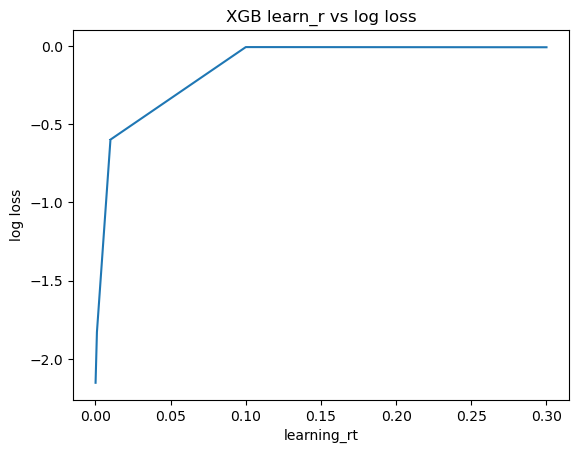

In [57]:
plt.errorbar(learning_rt, means, yerr = std1)
plt.title('XGB learn_r vs log loss')
plt.xlabel('learning_rt')
plt.ylabel('log loss')
plt.show()

In [42]:
##plot

In [44]:
# scores1 = np.array(means).reshape(len(max_depth), len(n_est1))

In [46]:
# for i, value in enumerate(max_depth):
#     plt.plot(n_est1, scores1[i], label = 'depth: ' + str(value))
# plt.legend()
# plt.xlabel('n_est')
# plt.ylabel('log_los')
# plt.savefig('n_est v log loss')